#  Predicting the next DSAT

Problem statement: DSAT's impacts any company with reputation and a small bit of revenue. Let's not get into SLA, But dsat's can be predicted and avoided based on the issue which customer comes up with and the agent's dealing with it. We service desk can definately do a vee bit to avoid such howler's. Guess what this small project can help us geta reality check on a way to avoid it and what process to know thoroghly to avoid them.

#  Loading libraries and Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error # the main evaluation metric
from sklearn import metrics
from sklearn.model_selection import train_test_split #for splitting the data

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's view the head and tail of our data set

In [2]:
df = pd.read_excel(r'C:\Users\91901\Documents\Python\ds.xlsx') #importing the excel file
df.head(10)

,Ticket no.,Opened by,string_value,Month,DSAT,BAY,Tenurity,Issue
0,NDC0722615,Adsolo,6,September,0,1,2,Bitlocker
1,NDC0725230,Animko,6,September,0,1,2,Bitlocker
2,BEG0269843,Annefebo,6,September,0,4,6,Branch apps
3,BEG0270255,Annefebo,6,September,0,4,6,Branch apps
4,NDC0726624,Avija,6,September,0,1,6,Bitlocker
5,BEG0269838,Adpana,6,September,0,2,6,Excel
6,BEG0270521,Adpana,6,September,0,2,6,Anitvirus
7,NDC0724670,Nisa,6,September,0,3,2,Bitlocker
8,NDC0723990,Nisa,6,September,0,3,2,Bitlocker
9,BEG0268872,Jeefa,6,September,0,4,2,Branch apps


In [3]:
df.tail(10)

,Ticket no.,Opened by,string_value,Month,DSAT,BAY,Tenurity,Issue
333,BEG0268716,Annefebo,5,August,0,4,6,Outlook
334,BEG0267844,donjon,6,August,0,3,6,Outlook
335,BEG0269111,Avija,6,August,0,1,6,Check book ordering
336,BEG0267903,idk,6,August,0,4,6,AT&T
337,NDC0722801,kubanu,6,August,0,4,2,Printer
338,NDC0716708,psy,3,August,1,2,5,Workstation issues
339,NDC0722891,Sandyman,6,August,0,3,6,Bitlocker
340,NDC0722557,naina,6,August,0,2,36,Bitlocker
341,BEG0269428,roxx,6,August,0,2,12,Outlook
342,NDC0721468,Satboy,5,August,0,2,4,Password Reset


# Data Wrangling and manipulation

Let's rename a few headings in our dataset 

In [4]:
df.rename(columns={'string_value':'Satisfaction'},inplace=True) #converting string_value to satisfaction
df.rename(columns={'Opened by':'Name'},inplace=True) #converting Opened by to Name
df.head()

,Ticket no.,Name,Satisfaction,Month,DSAT,BAY,Tenurity,Issue
0,NDC0722615,Adsolo,6,September,0,1,2,Bitlocker
1,NDC0725230,Animko,6,September,0,1,2,Bitlocker
2,BEG0269843,Annefebo,6,September,0,4,6,Branch apps
3,BEG0270255,Annefebo,6,September,0,4,6,Branch apps
4,NDC0726624,Avija,6,September,0,1,6,Bitlocker


We'll create a new column called CSAT which is the opposite of DSAT 

DSAT is the dissatisfaction of a customer for a perticular call tagged to the agent and CSAT being satisfied with the service

In [5]:
df['CSAT']=1 #setting a default value of 1 
df['CSAT'][df['DSAT']==1]=0 # updating a 0 for every 1 on a DSAT
df.head()

C:\Users\91901\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Ticket no.,Name,Satisfaction,Month,DSAT,BAY,Tenurity,Issue,CSAT
0,NDC0722615,Adsolo,6,September,0,1,2,Bitlocker,1
1,NDC0725230,Animko,6,September,0,1,2,Bitlocker,1
2,BEG0269843,Annefebo,6,September,0,4,6,Branch apps,1
3,BEG0270255,Annefebo,6,September,0,4,6,Branch apps,1
4,NDC0726624,Avija,6,September,0,1,6,Bitlocker,1


4 bays are present on the floor so let's convert an int value to a string.
 Bay has int values based on the bay

In [6]:
#converting/updating to the corresponding int value for the bay 
df['BAY'][df['BAY']==1]='BAY1' 
df['BAY'][df['BAY']==2]='BAY2'
df['BAY'][df['BAY']==3]='BAY3'
df['BAY'][df['BAY']==4]='BAY4'
df.head()

C:\Users\91901\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Ticket no.,Name,Satisfaction,Month,DSAT,BAY,Tenurity,Issue,CSAT
0,NDC0722615,Adsolo,6,September,0,BAY1,2,Bitlocker,1
1,NDC0725230,Animko,6,September,0,BAY1,2,Bitlocker,1
2,BEG0269843,Annefebo,6,September,0,BAY4,6,Branch apps,1
3,BEG0270255,Annefebo,6,September,0,BAY4,6,Branch apps,1
4,NDC0726624,Avija,6,September,0,BAY1,6,Bitlocker,1


Creating a new column for every issue and assigning an int value to it 

In [7]:
df['Issue_int']=df['Issue']
df['Issue_int'][df['Issue_int']=='AT&T']=1
df['Issue_int'][df['Issue_int']=='Anitvirus']=2
df['Issue_int'][df['Issue_int']=='Application']=3
df['Issue_int'][df['Issue_int']=='Bitlocker']=4
df['Issue_int'][df['Issue_int']=='Branch apps']=5
df['Issue_int'][df['Issue_int']=='Check book ordering']=6
df['Issue_int'][df['Issue_int']=='Excel']=7
df['Issue_int'][df['Issue_int']=='File Restoration']=8
df['Issue_int'][df['Issue_int']=='Outlook']=9
df['Issue_int'][df['Issue_int']=='Password Reset']=10
df['Issue_int'][df['Issue_int']=='Phone issue']=11
df['Issue_int'][df['Issue_int']=='Printer']=12
df['Issue_int'][df['Issue_int']=='Server issues']=13
df['Issue_int'][df['Issue_int']=='Skype']=14
df['Issue_int'][df['Issue_int']=='Tracs']=15
df['Issue_int'][df['Issue_int']=='VDI']=16
df['Issue_int'][df['Issue_int']=='Workstation issues']=17

C:\Users\91901\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\91901\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\91901\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\91901\Anaconda3\lib\

Similarly creating a new column for all the agents attending the calls with corresponding int values

In [8]:
df['Name_int']=df['Name']
df['Name_int'][df['Name_int']=='Adsolo']=1
df['Name_int'][df['Name_int']=='Aleamo']=2
df['Name_int'][df['Name_int']=='Animko']=3
df['Name_int'][df['Name_int']=='Annefebo']=4
df['Name_int'][df['Name_int']=='Avija']=5
df['Name_int'][df['Name_int']=='Adpana']=6
df['Name_int'][df['Name_int']=='Nisa']=7
df['Name_int'][df['Name_int']=='justleft']=8
df['Name_int'][df['Name_int']=='fatdeli']=9
df['Name_int'][df['Name_int']=='Jeefa']=10
df['Name_int'][df['Name_int']=='jan']=11
df['Name_int'][df['Name_int']=='roxx']=12
df['Name_int'][df['Name_int']=='fedup']=13
df['Name_int'][df['Name_int']=='iamlegend']=14
df['Name_int'][df['Name_int']=='kubanu']=15
df['Name_int'][df['Name_int']=='leemsteff']=16
df['Name_int'][df['Name_int']=='donjon']=17
df['Name_int'][df['Name_int']=='rin']=18
df['Name_int'][df['Name_int']=='hr']=19
df['Name_int'][df['Name_int']=='neel']=20
df['Name_int'][df['Name_int']=='nitshit']=21
df['Name_int'][df['Name_int']=='babs']=22
df['Name_int'][df['Name_int']=='kd']=23
df['Name_int'][df['Name_int']=='nisch']=24
df['Name_int'][df['Name_int']=='freakyhr']=25
df['Name_int'][df['Name_int']=='Sandyman']=26
df['Name_int'][df['Name_int']=='shehatesme']=27
df['Name_int'][df['Name_int']=='Satboy']=28
df['Name_int'][df['Name_int']=='nosy']=29
df['Name_int'][df['Name_int']=='mrpretentious']=30
df['Name_int'][df['Name_int']=='psy']=31
df['Name_int'][df['Name_int']=='hateher']=32
df['Name_int'][df['Name_int']=='crushme']=33
df['Name_int'][df['Name_int']=='vasak']=34
df['Name_int'][df['Name_int']=='idk']=35
df['Name_int'][df['Name_int']=='naina']=36

C:\Users\91901\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\91901\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\91901\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\91901\Anaconda3\lib\

C:\Users\91901\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\91901\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\91901\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\91901\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [9]:
df.head()

,Ticket no.,Name,Satisfaction,Month,DSAT,BAY,Tenurity,Issue,CSAT,Issue_int,Name_int
0,NDC0722615,Adsolo,6,September,0,BAY1,2,Bitlocker,1,4,1
1,NDC0725230,Animko,6,September,0,BAY1,2,Bitlocker,1,4,3
2,BEG0269843,Annefebo,6,September,0,BAY4,6,Branch apps,1,5,4
3,BEG0270255,Annefebo,6,September,0,BAY4,6,Branch apps,1,5,4
4,NDC0726624,Avija,6,September,0,BAY1,6,Bitlocker,1,4,5


In [10]:
df.dtypes

Ticket no.      object
Name            object
Satisfaction     int64
Month           object
DSAT             int64
BAY             object
Tenurity         int64
Issue           object
CSAT             int64
Issue_int       object
Name_int        object
dtype: object

In [11]:
df['Issue_int'] = df['Issue_int'].astype('int64') #converting issue to int
df['Name_int'] = df['Name_int'].astype('int64') #convrting name to int
df.dtypes

Ticket no.      object
Name            object
Satisfaction     int64
Month           object
DSAT             int64
BAY             object
Tenurity         int64
Issue           object
CSAT             int64
Issue_int        int64
Name_int         int64
dtype: object

# Let's visualize Some important Factors 

First of all lets make a word cloud for the issue which get's us the maximum csat's

In [12]:
from wordcloud import WordCloud, STOPWORDS #importing word cloud
issue_wc = open('file.txt', 'r').read() #i've just pasted the issues on a text file

stopwords = set(STOPWORDS)
# instantiate a word cloud object
issue_wcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
issue_wcloud.generate(issue_wc)

Let's View it

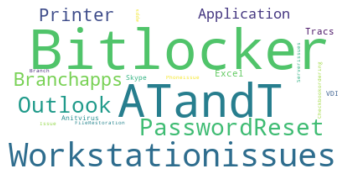

In [13]:
import matplotlib.pyplot as plt
plt.imshow(issue_wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Wait that's too small, Let's make it big!

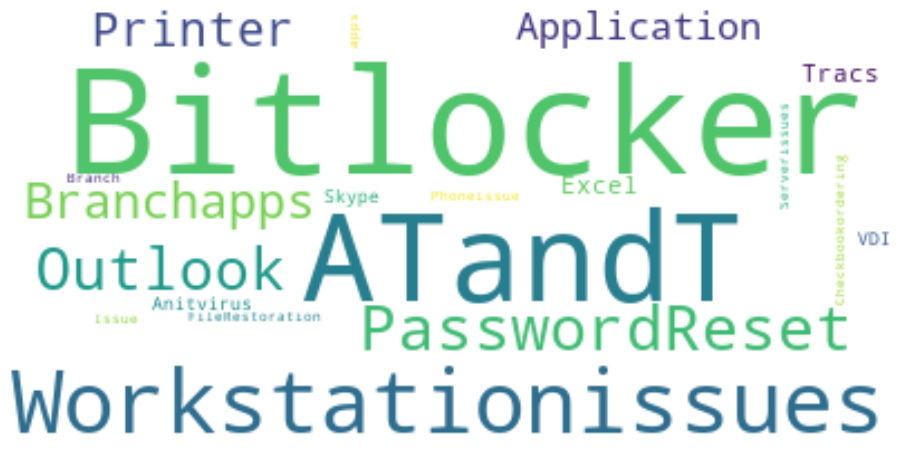

In [14]:
fig = plt.figure()
fig.set_figwidth(16) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(issue_wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Now let's make 2 waffle charts,each depicts all the csat's and dsat's per bay 

In [15]:
# group bay by bay and apply sum() function 
df_bay = df.groupby('BAY', axis=0).sum()
# the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df.groupby('BAY', axis=0)))
#lets drop satisfaction and a few more features cause sum of that makes no sense!
df_bay.drop(['Satisfaction','Tenurity','Issue_int','Name_int'],axis=1).head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,DSAT,CSAT
BAY,,
BAY1,6,64
BAY2,10,84
BAY3,18,79
BAY4,15,67


Let's start our waffle chart

In [16]:
#categorising the weights of csat's in each bay
total_values = sum(df_bay['CSAT'])
category_proportions = [(float(value) / total_values) for value in df_bay['CSAT']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_bay.index.values[i] + ': ' + str(proportion))     

BAY1: 0.21768707482993196
BAY2: 0.2857142857142857
BAY3: 0.2687074829931973
BAY4: 0.22789115646258504


In [17]:
width = 50 # width of chart
height = 15 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  750


In [18]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_bay.index.values[i] + ': ' + str(tiles))

BAY1: 163
BAY2: 214
BAY3: 202
BAY4: 171


Let's view the chart

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

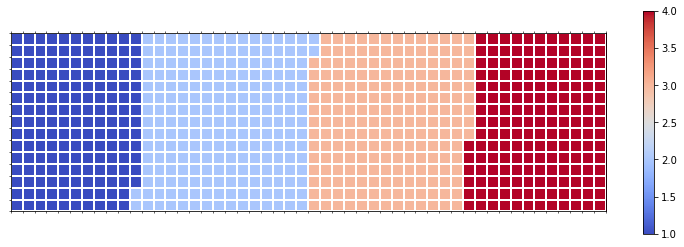

In [19]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])        

# Similarly for all the DSAT's for each bay

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

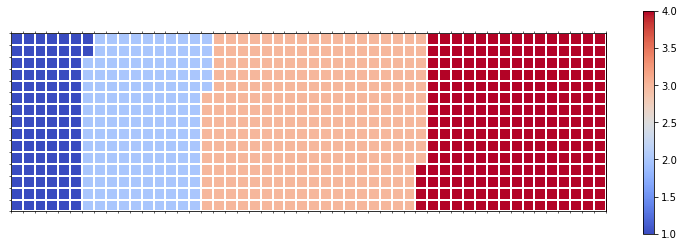

In [20]:
total_values = sum(df_bay['DSAT'])
category_proportions = [(float(value) / total_values) for value in df_bay['DSAT']]

width = 50 # width of chart
height = 15 # height of chart

total_num_tiles = width * height # total number of tiles

# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# Let's visualize the same thing using pie chart's

The purpose of this is solely to the make your understanding better! :\

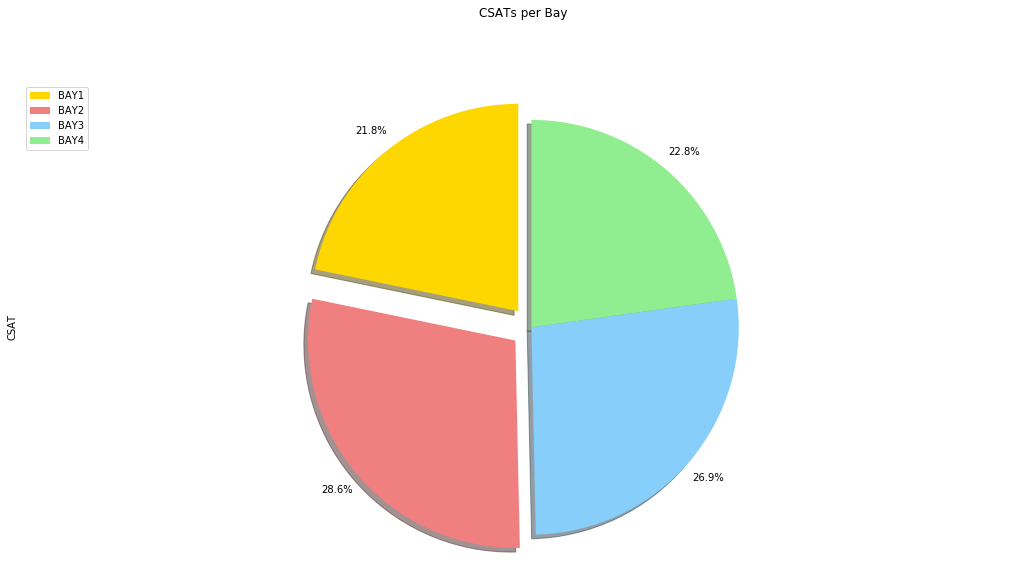

In [21]:
colors_list = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen'] #choosing the colors
explode_list = [0.1, 0.1, 0, 0] # ratio for each bay with which to offset each wedge.

df_bay['CSAT'].plot(kind='pie',
                            figsize=(18, 9),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('CSATs per Bay', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_bay.index, loc='upper left') 

plt.show()

Let's do the same thing using DSAT's

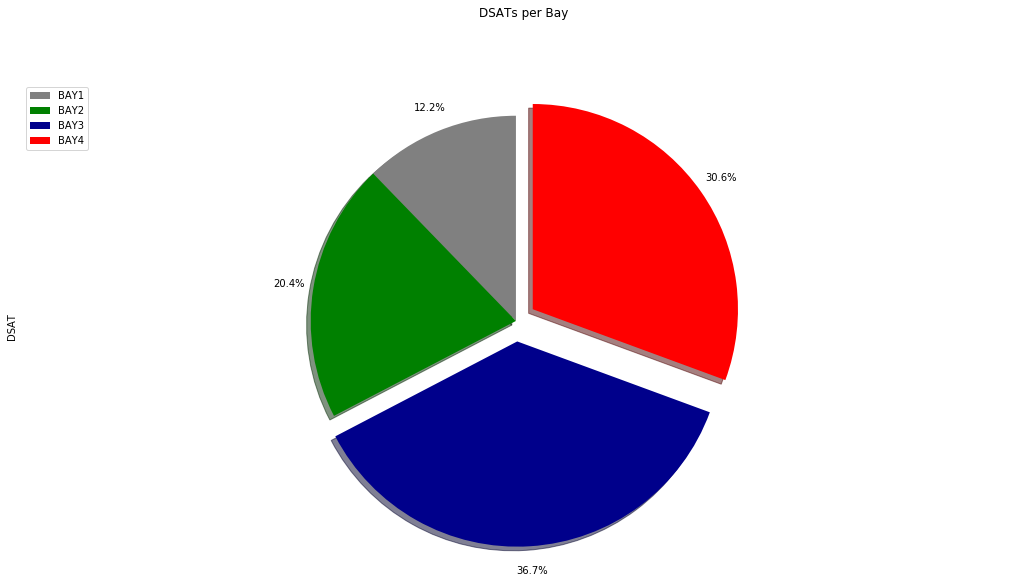

In [22]:
colors_list = ['Grey', 'Green', 'darkblue', 'Red']
explode_list = [0, 0, 0.1, 0.1] # ratio for each bay with which to offset each wedge.

df_bay['DSAT'].plot(kind='pie',
                            figsize=(18, 9),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('DSATs per Bay', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_bay.index, loc='upper left') 

plt.show()

# Let's visualize the gravity of each issue leading to a CSAT or a DSAT

Let's first view the sum of dsat's and csat's per issu now!! 

In [23]:
df_issue = df.groupby('Issue', axis=0).sum()
df_issue.drop(['Satisfaction','Tenurity','Issue_int','Name_int'],axis=1).head(20)

,DSAT,CSAT
Issue,,
AT&T,9,47
Anitvirus,0,2
Application,6,8
Bitlocker,4,77
Branch apps,2,24
Check book ordering,0,1
Excel,1,3
File Restoration,0,1
Outlook,11,27


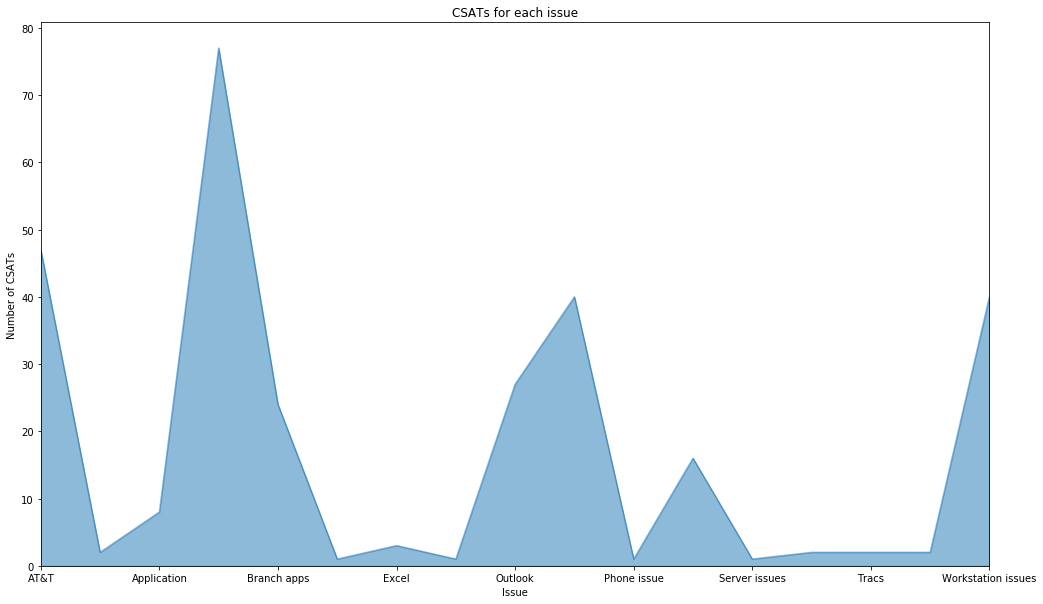

In [24]:
df_top5 = df_issue

# transpose the dataframe
df_top5 = df_top5['CSAT'].transpose() 

#df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             #color = 'blue',
             stacked= False,
             figsize=(17, 10), # pass a tuple (x, y) size
             )

plt.title('CSATs for each issue')
plt.ylabel('Number of CSATs')
plt.xlabel('Issue')

plt.show()

# Let's do the same thing for DSAT's but with another color

Repetition is key to succession!!

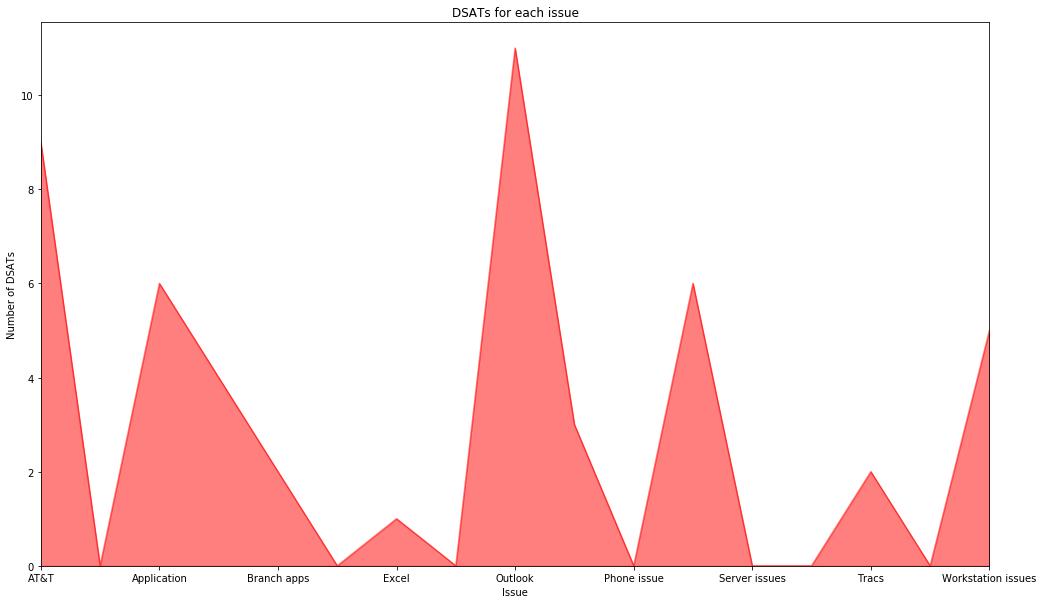

In [25]:
df_top5 = df_issue

df_top5 = df_top5['DSAT'].transpose() 

#df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             color = 'red',
             stacked=False,
             figsize=(17, 10), # pass a tuple (x, y) size
             )

plt.title('DSATs for each issue')
plt.ylabel('Number of DSATs')
plt.xlabel('Issue')

plt.show()

# Time for predicting:

# Define our features and Split the dataframe for training and testing

I've decided to train my models on 3 three parameter's :
1)Issue
2)Tenurity
3)Agent taking the call

So let's go ahead and split our dataframe into 80-20% and define our features 

In [26]:
feature_columns = df[['Tenurity', 'Issue_int','Name_int']]#defining the features
X = np.asarray(feature_columns)
y = np.asarray(df['DSAT']) #our job is to predict dsat's, so convrting it to an array for manipulation
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)#splitting our dataset
print ('Train set:', X_train.shape,  y_train.shape) #count of training set
print ('Test set:', X_test.shape,  y_test.shape) #count of test set

Train set: (274, 3) (274,)
Test set: (69, 3) (69,)


# First of, Let's use Support Vector machines

Svm's are considered one of the best classification algorithms. So let's use it

In [27]:
from sklearn import svm #importing svm
clf = svm.SVC(kernel='rbf') #selecting the model
clf.fit(X_train, y_train) #training our model
y_val = clf.predict(X_test) #yhat has the predicted dsat's list for every call
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_val))
mse = mean_squared_error(y_val, y_test)
print("Validation MAE for SVM: {}".format(mse))

Train set Accuracy:  0.8905109489051095
Test set Accuracy:  0.855072463768116
Validation MAE for SVM: 0.14492753623188406


C:\Users\91901\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
#check the error between the actual dsat's and the predicted dsat's 
a , b= y_val.sum() , y_test.sum() #diving the predicted values 
err=a/b
err

0.3333333333333333

In [29]:
#difference in the dsat's predicted 
print(y_test.sum()-y_val.sum())

6


Let's visualize this model

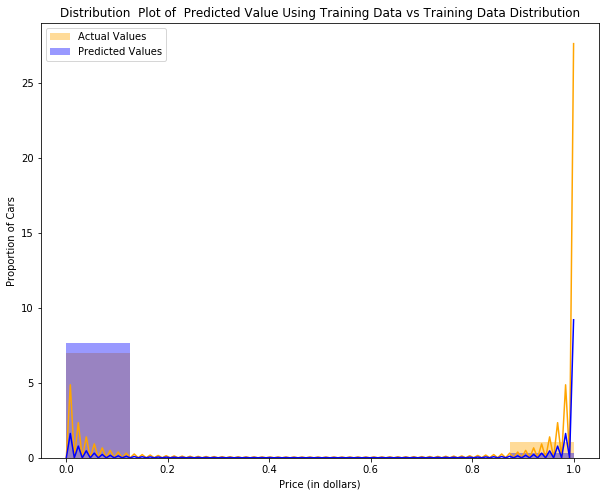

In [31]:
def DistributionPlot(OrangeFunction, BlueFunction, OrangeName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(OrangeFunction, hist=True, color="orange", label=OrangeName)
    ax2 = sns.distplot(BlueFunction, hist=True, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend(loc='upper left') 

    plt.show()
    plt.close()

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_val, "Actual Values", "Predicted Values", Title)

# Let's go for Decision Tree Regressor as our next model

In [32]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DTree.fit(X_train,y_train)
y_val = DTree.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_val))
mse = mean_squared_error(y_val, y_test)
print("Validation MAE for DTR: {}".format(mse))

Train set Accuracy:  0.8978102189781022
Test set Accuracy:  0.8695652173913043
Validation MAE for DTR: 0.13043478260869565


In [33]:
#check the error between the actual dsat's and the predicted dsat's 
a , b= y_val.sum() , y_test.sum() #diving the predicted values 
err=a/b
err

0.4444444444444444

In [34]:
#difference in the dsat's predicted 
print(y_test.sum()-y_val.sum())

5


Visualising this model as well

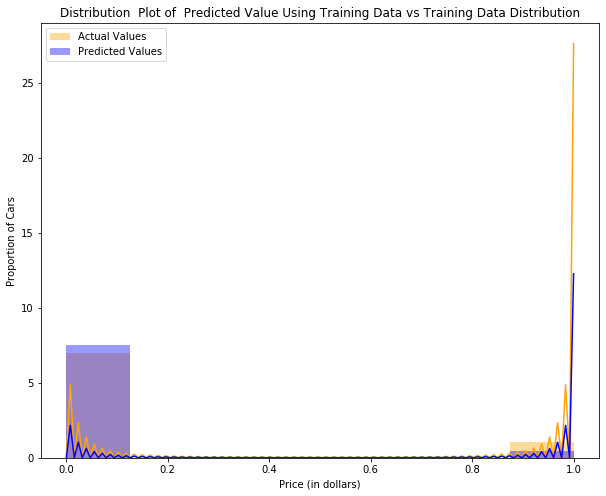

In [35]:
def DistributionPlot(OrangeFunction, BlueFunction, OrangeName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(OrangeFunction, hist=True, color="orange", label=OrangeName)
    ax2 = sns.distplot(BlueFunction, hist=True, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend(loc='upper left') 

    plt.show()
    plt.close()

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_val, "Actual Values", "Predicted Values", Title)

# Boosting our Algorithm with ADA boost classifier

In [36]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=13), n_estimators=1000,
    algorithm="SAMME.R", learning_rate=0.02)
ada_clf.fit(X_train, y_train)
y_val = ada_clf.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, ada_clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_val))
mae = mean_squared_error(y_val, y_test)
print("Validation MAE for ADA boost classifier is: {}".format(mae))

Train set Accuracy:  0.9306569343065694
Test set Accuracy:  0.855072463768116
Validation MAE for ADA boost classifier is: 0.14492753623188406


In [37]:
#check the error between the actual dsat's and the predicted dsat's 
a , b= y_val.sum() , y_test.sum() #diving the predicted values 
err=a/b
err

0.7777777777777778

Let's go aheadband visualize this as well

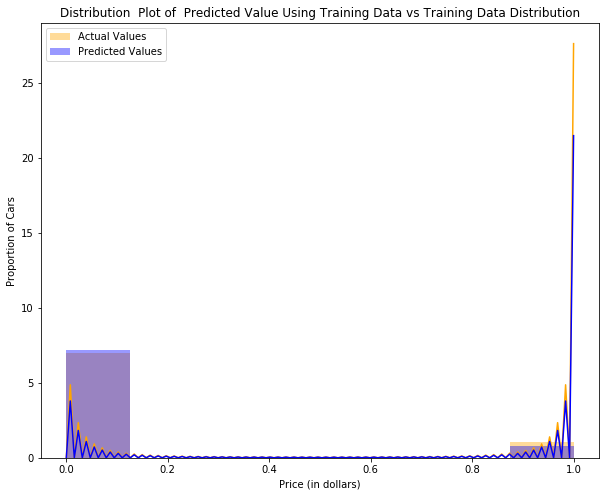

In [38]:
def DistributionPlot(OrangeFunction, BlueFunction, OrangeName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(OrangeFunction, hist=True, color="orange", label=OrangeName)
    ax2 = sns.distplot(BlueFunction, hist=True, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend(loc='upper left') 

    plt.show()
    plt.close()

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_val, "Actual Values", "Predicted Values", Title)

# Fine tuning our classifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=7), n_estimators=900,
    algorithm="SAMME.R", learning_rate=0.01)
ada_clf.fit(X_train, y_train)
y_val = ada_clf.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, ada_clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_val))
mae = mean_squared_error(y_val, y_test)
print("Validation MAE for ADA boost classifier is: {}".format(mae))

Train set Accuracy:  0.9306569343065694
Test set Accuracy:  0.8695652173913043
Validation MAE for ADA boost classifier is: 0.13043478260869565


In [40]:
#check the error between the actual dsat's and the predicted dsat's 
a , b= y_val.sum() , y_test.sum() #diving the predicted values 
err=a/b
err

0.8888888888888888

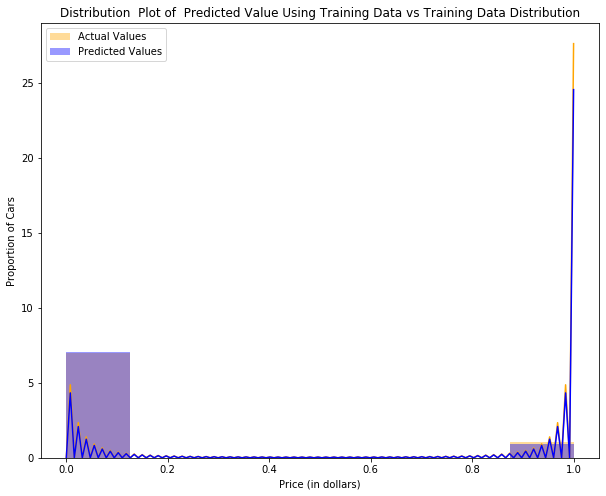

In [41]:
def DistributionPlot(OrangeFunction, BlueFunction, OrangeName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(OrangeFunction, hist=True, color="orange", label=OrangeName)
    ax2 = sns.distplot(BlueFunction, hist=True, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend(loc='upper left') 

    plt.show()
    plt.close()

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_val, "Actual Values", "Predicted Values", Title)